In [1]:
using Plots

#Make plots look like Bishop
Plots.default(markerstrokewidth=1.2, markerstrokecolor=:blue, 
    markeralpha=0, alpha=1, dpi=400)
pyplot()

Plots.PyPlotBackend()

In [2]:
using Distributions
using Printf
using LaTeXStrings

In [9]:
include("../src/linear_regression.jl")
include("../src/features.jl")

gaussian_expansion (generic function with 1 method)

## Basis Functions

Some examples of basis functions.

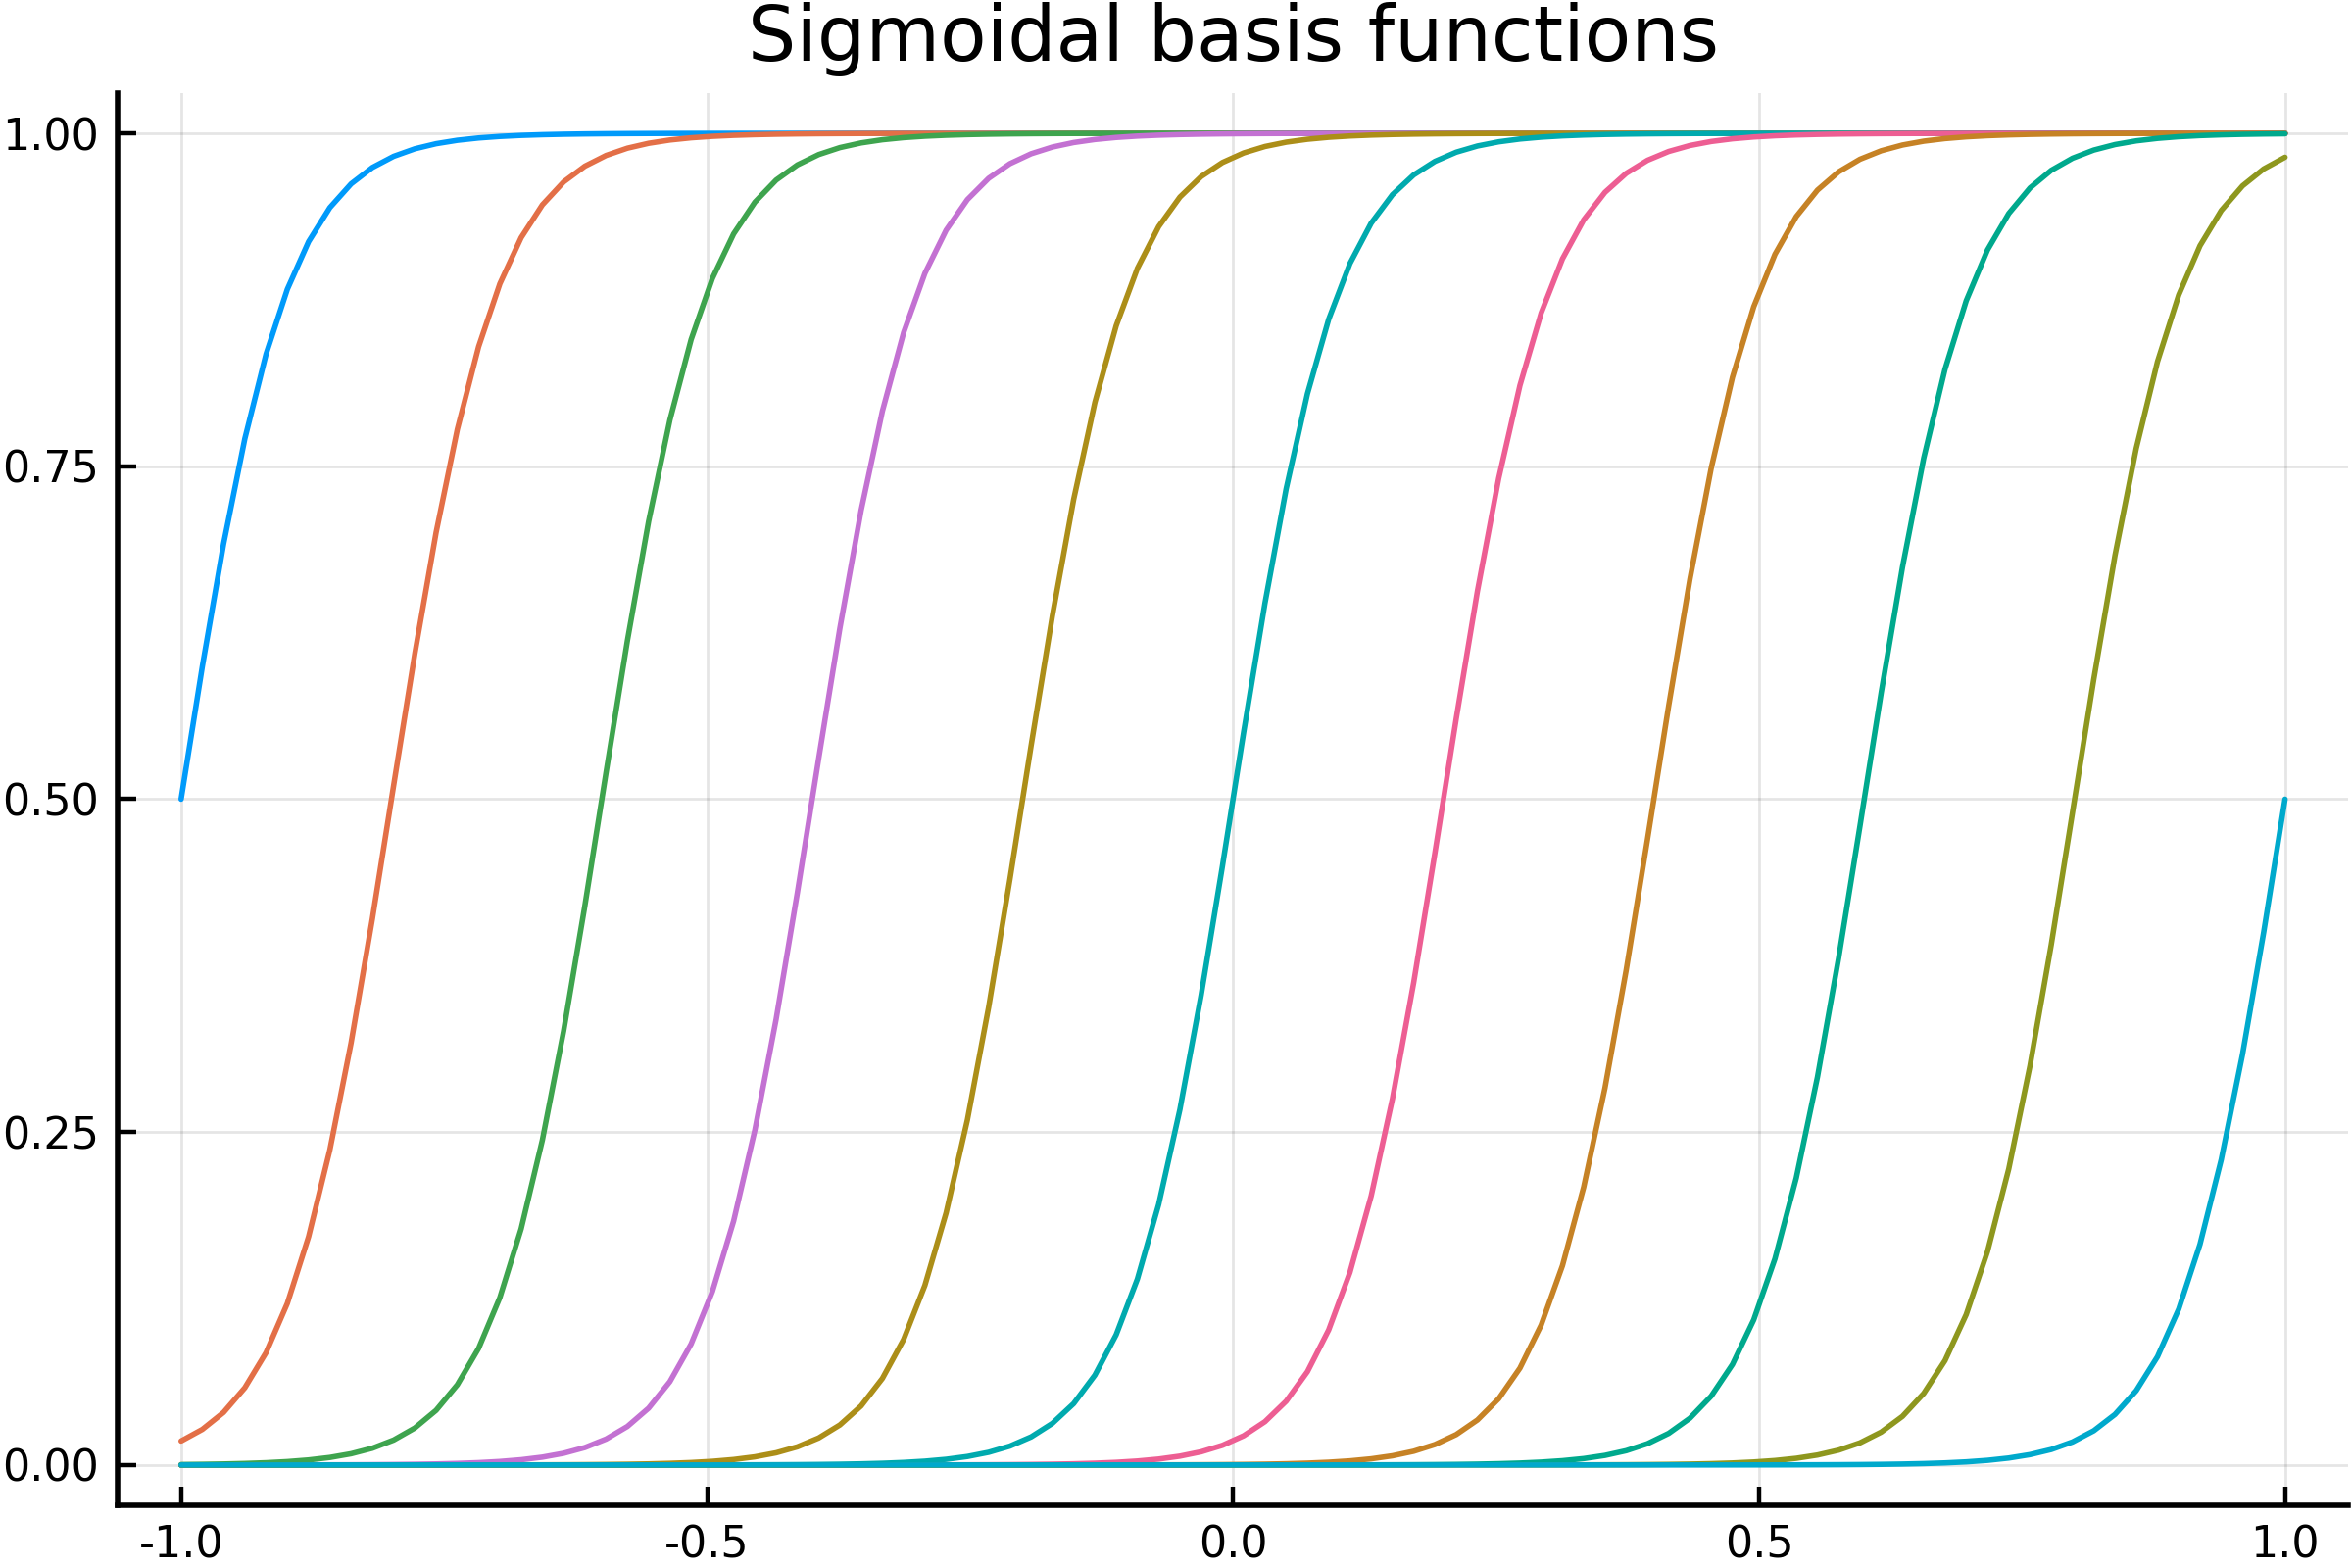

In [4]:
μs = range(-1, 1, length=11)
x = range(-1, 1, length=100)
s = 0.05
p = plot(legend=false)
for μ in μs
    plot!(x, x -> S(x, μ, s))
end
title!("Sigmoidal basis functions")
p

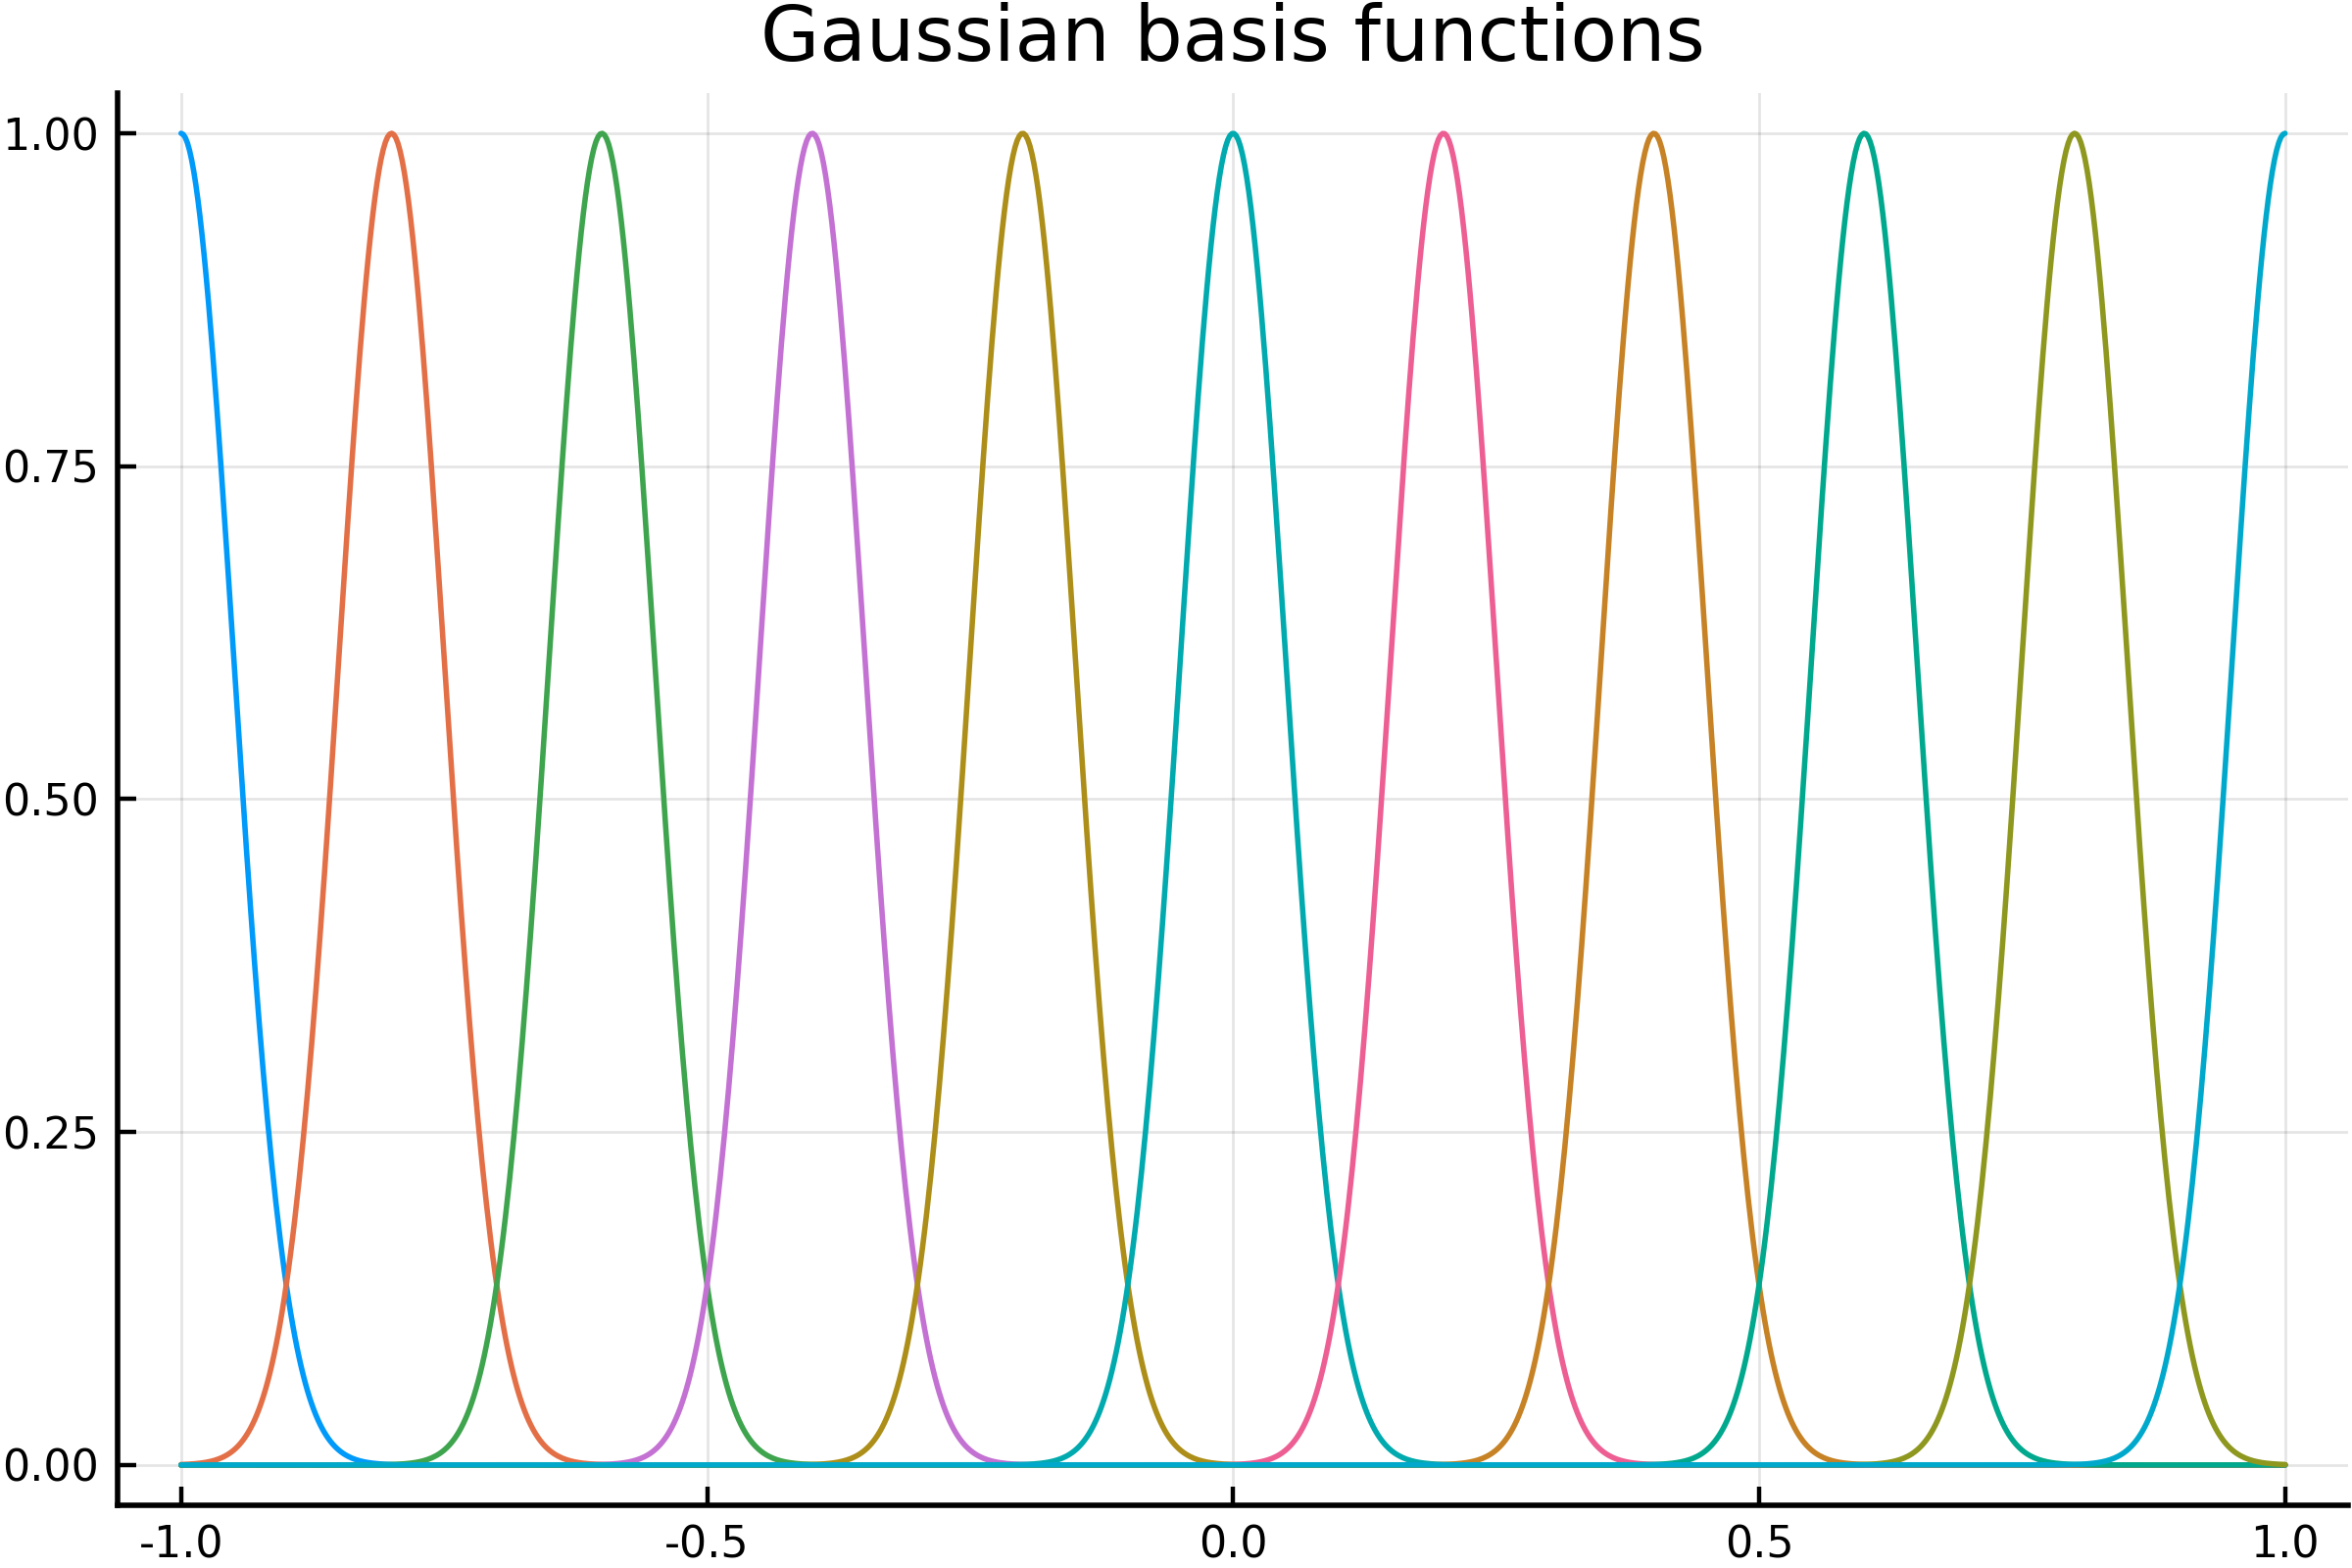

In [5]:
μs = range(-1, 1, length=11)
x = range(-1, 1, length=1000)
s = 0.05
p = plot(legend=false)
for μ in μs
    plot!(x, x -> G(x, μ, s))
end
title!("Gaussian basis functions")
p

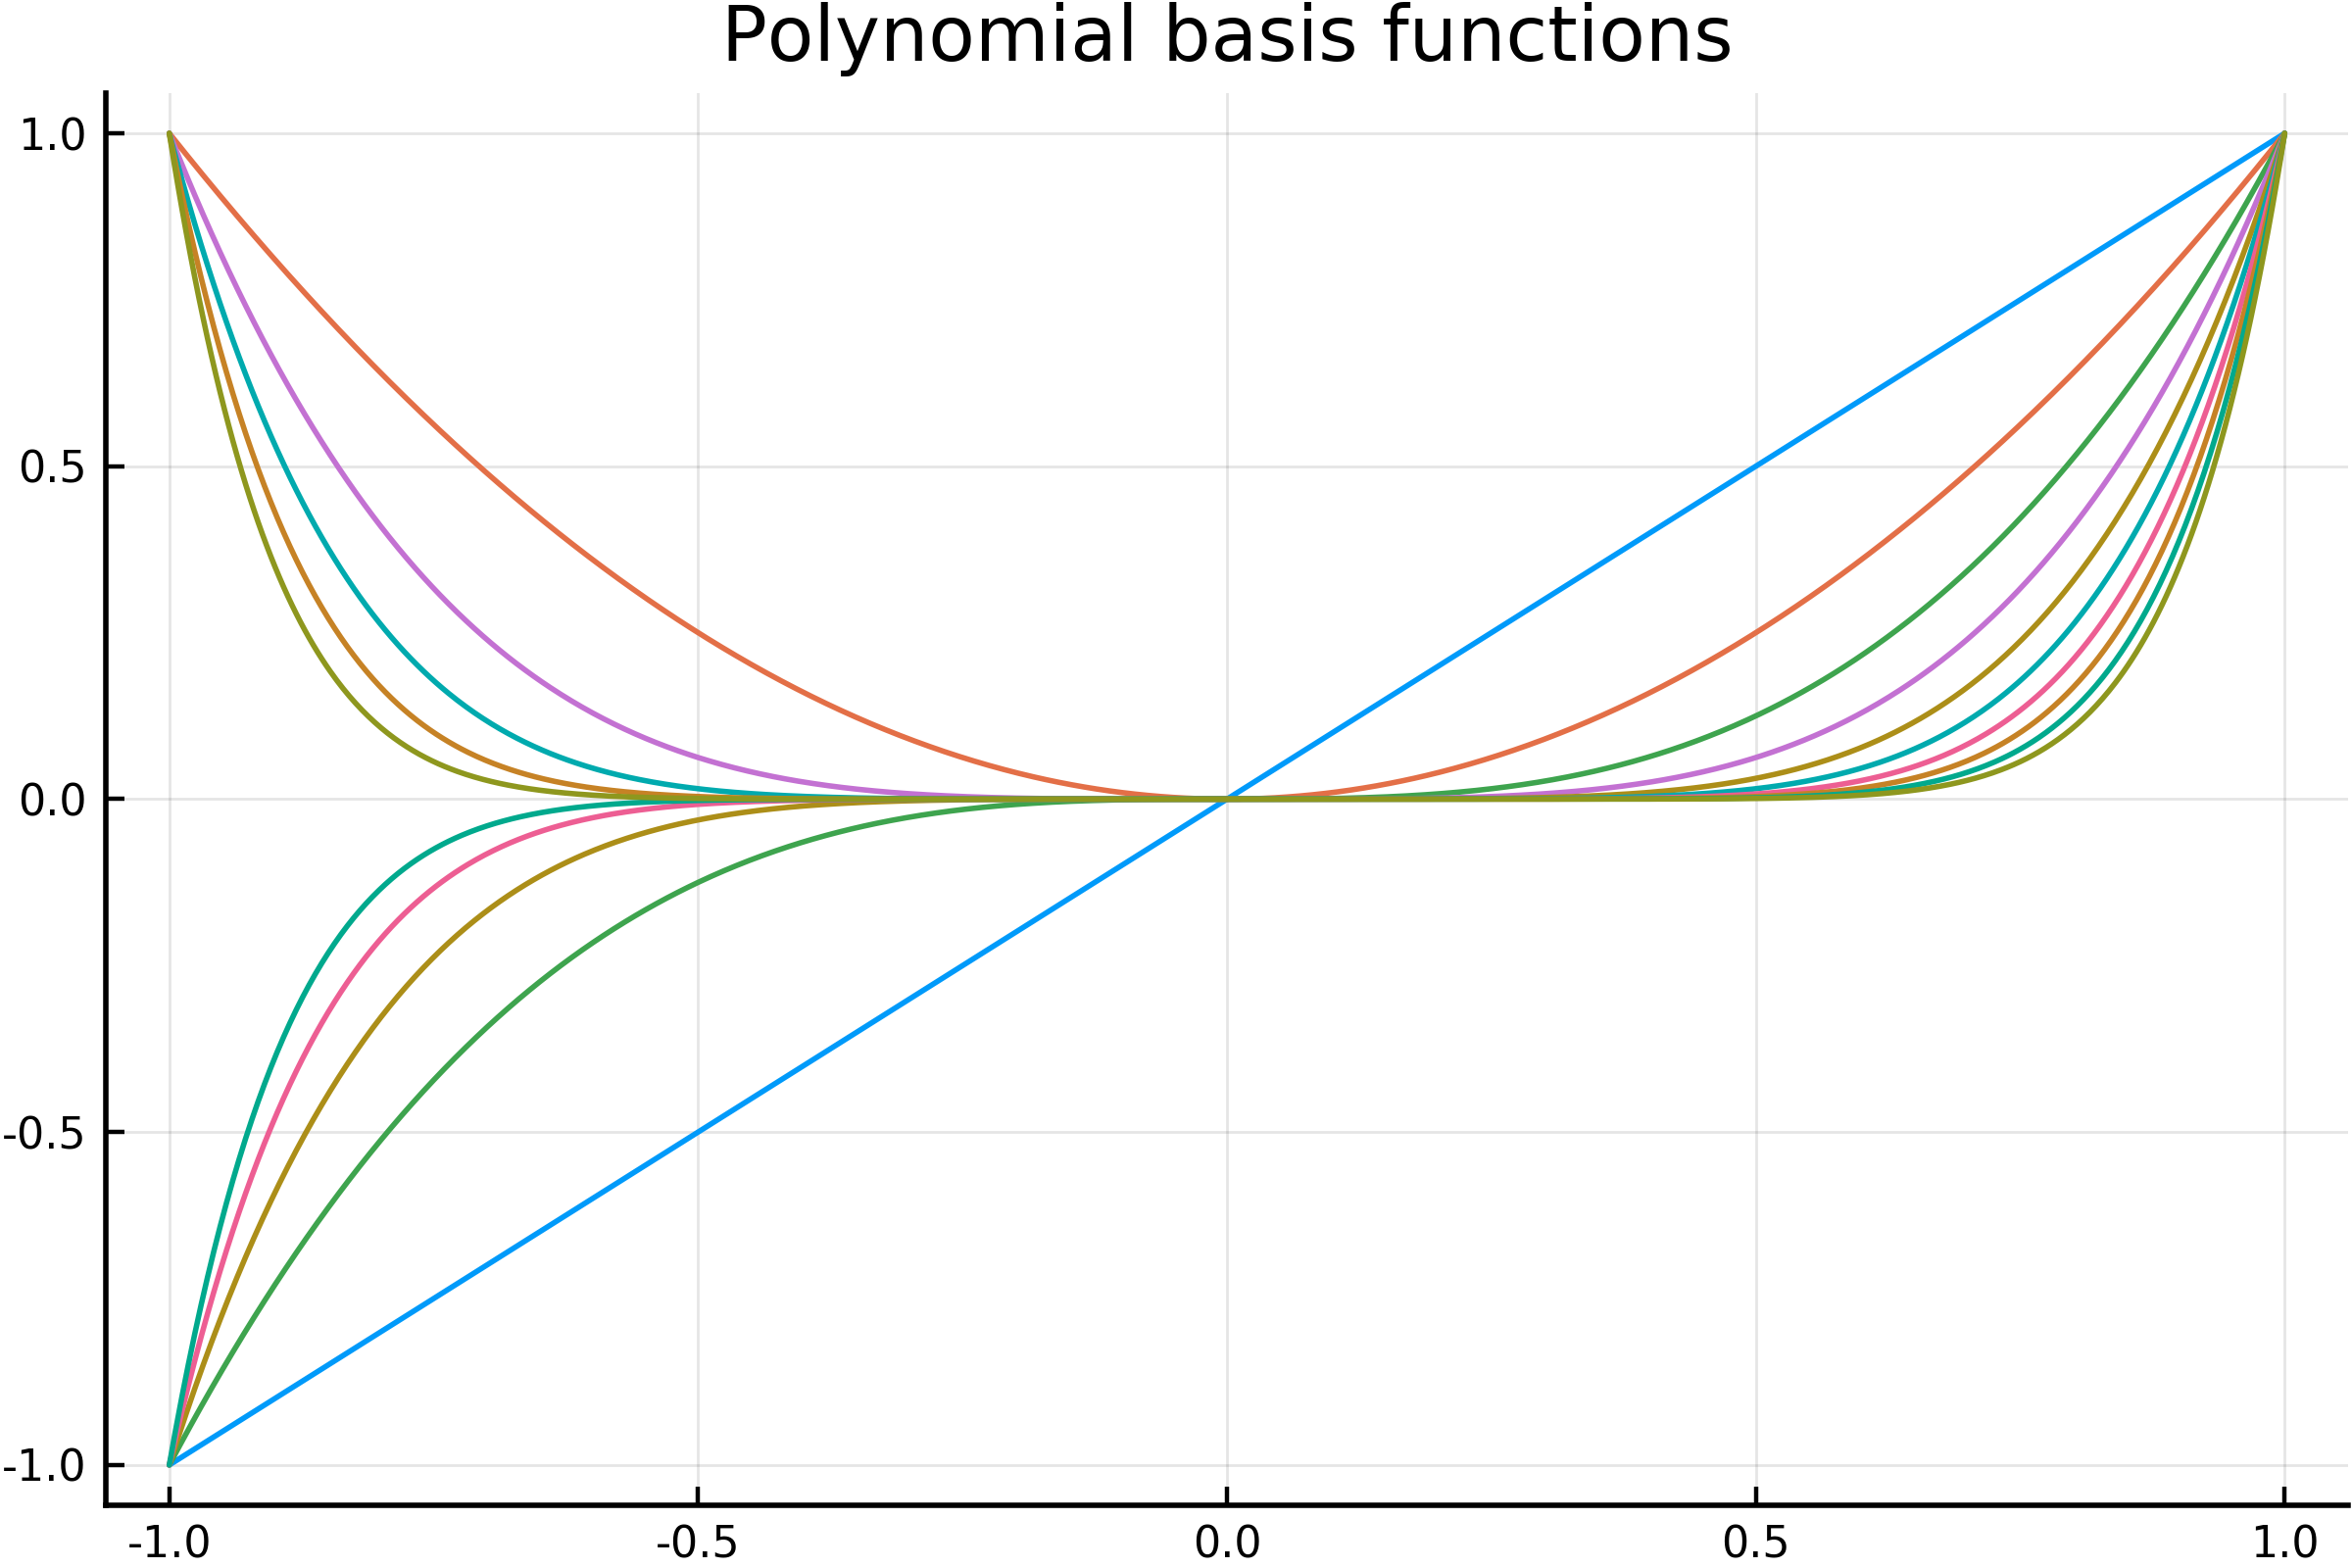

In [6]:
μs = range(-1, 1, length=11)
x = range(-1, 1, length=1000)
p = plot(legend=false)
degree = 10
for i in 1:degree
    plot!(x, x -> x^i)
end
title!("Polynomial basis functions")
p

## Bias-Variance Decomposition

Generate some datasets to ilustrate the bias-variance decomposition

In [7]:
h(x) = sin(2π*x) # true function
L = 100 # No. of datasets
N = 25 # Points in each dataset
datasets = []
for _ in 1:L
    d = Normal(0., 0.3)
    X = rand(N)
    y = [h(x) + rand(d) for x in X]
    push!(datasets, [X, y])
end

Let's see one example of these datasets

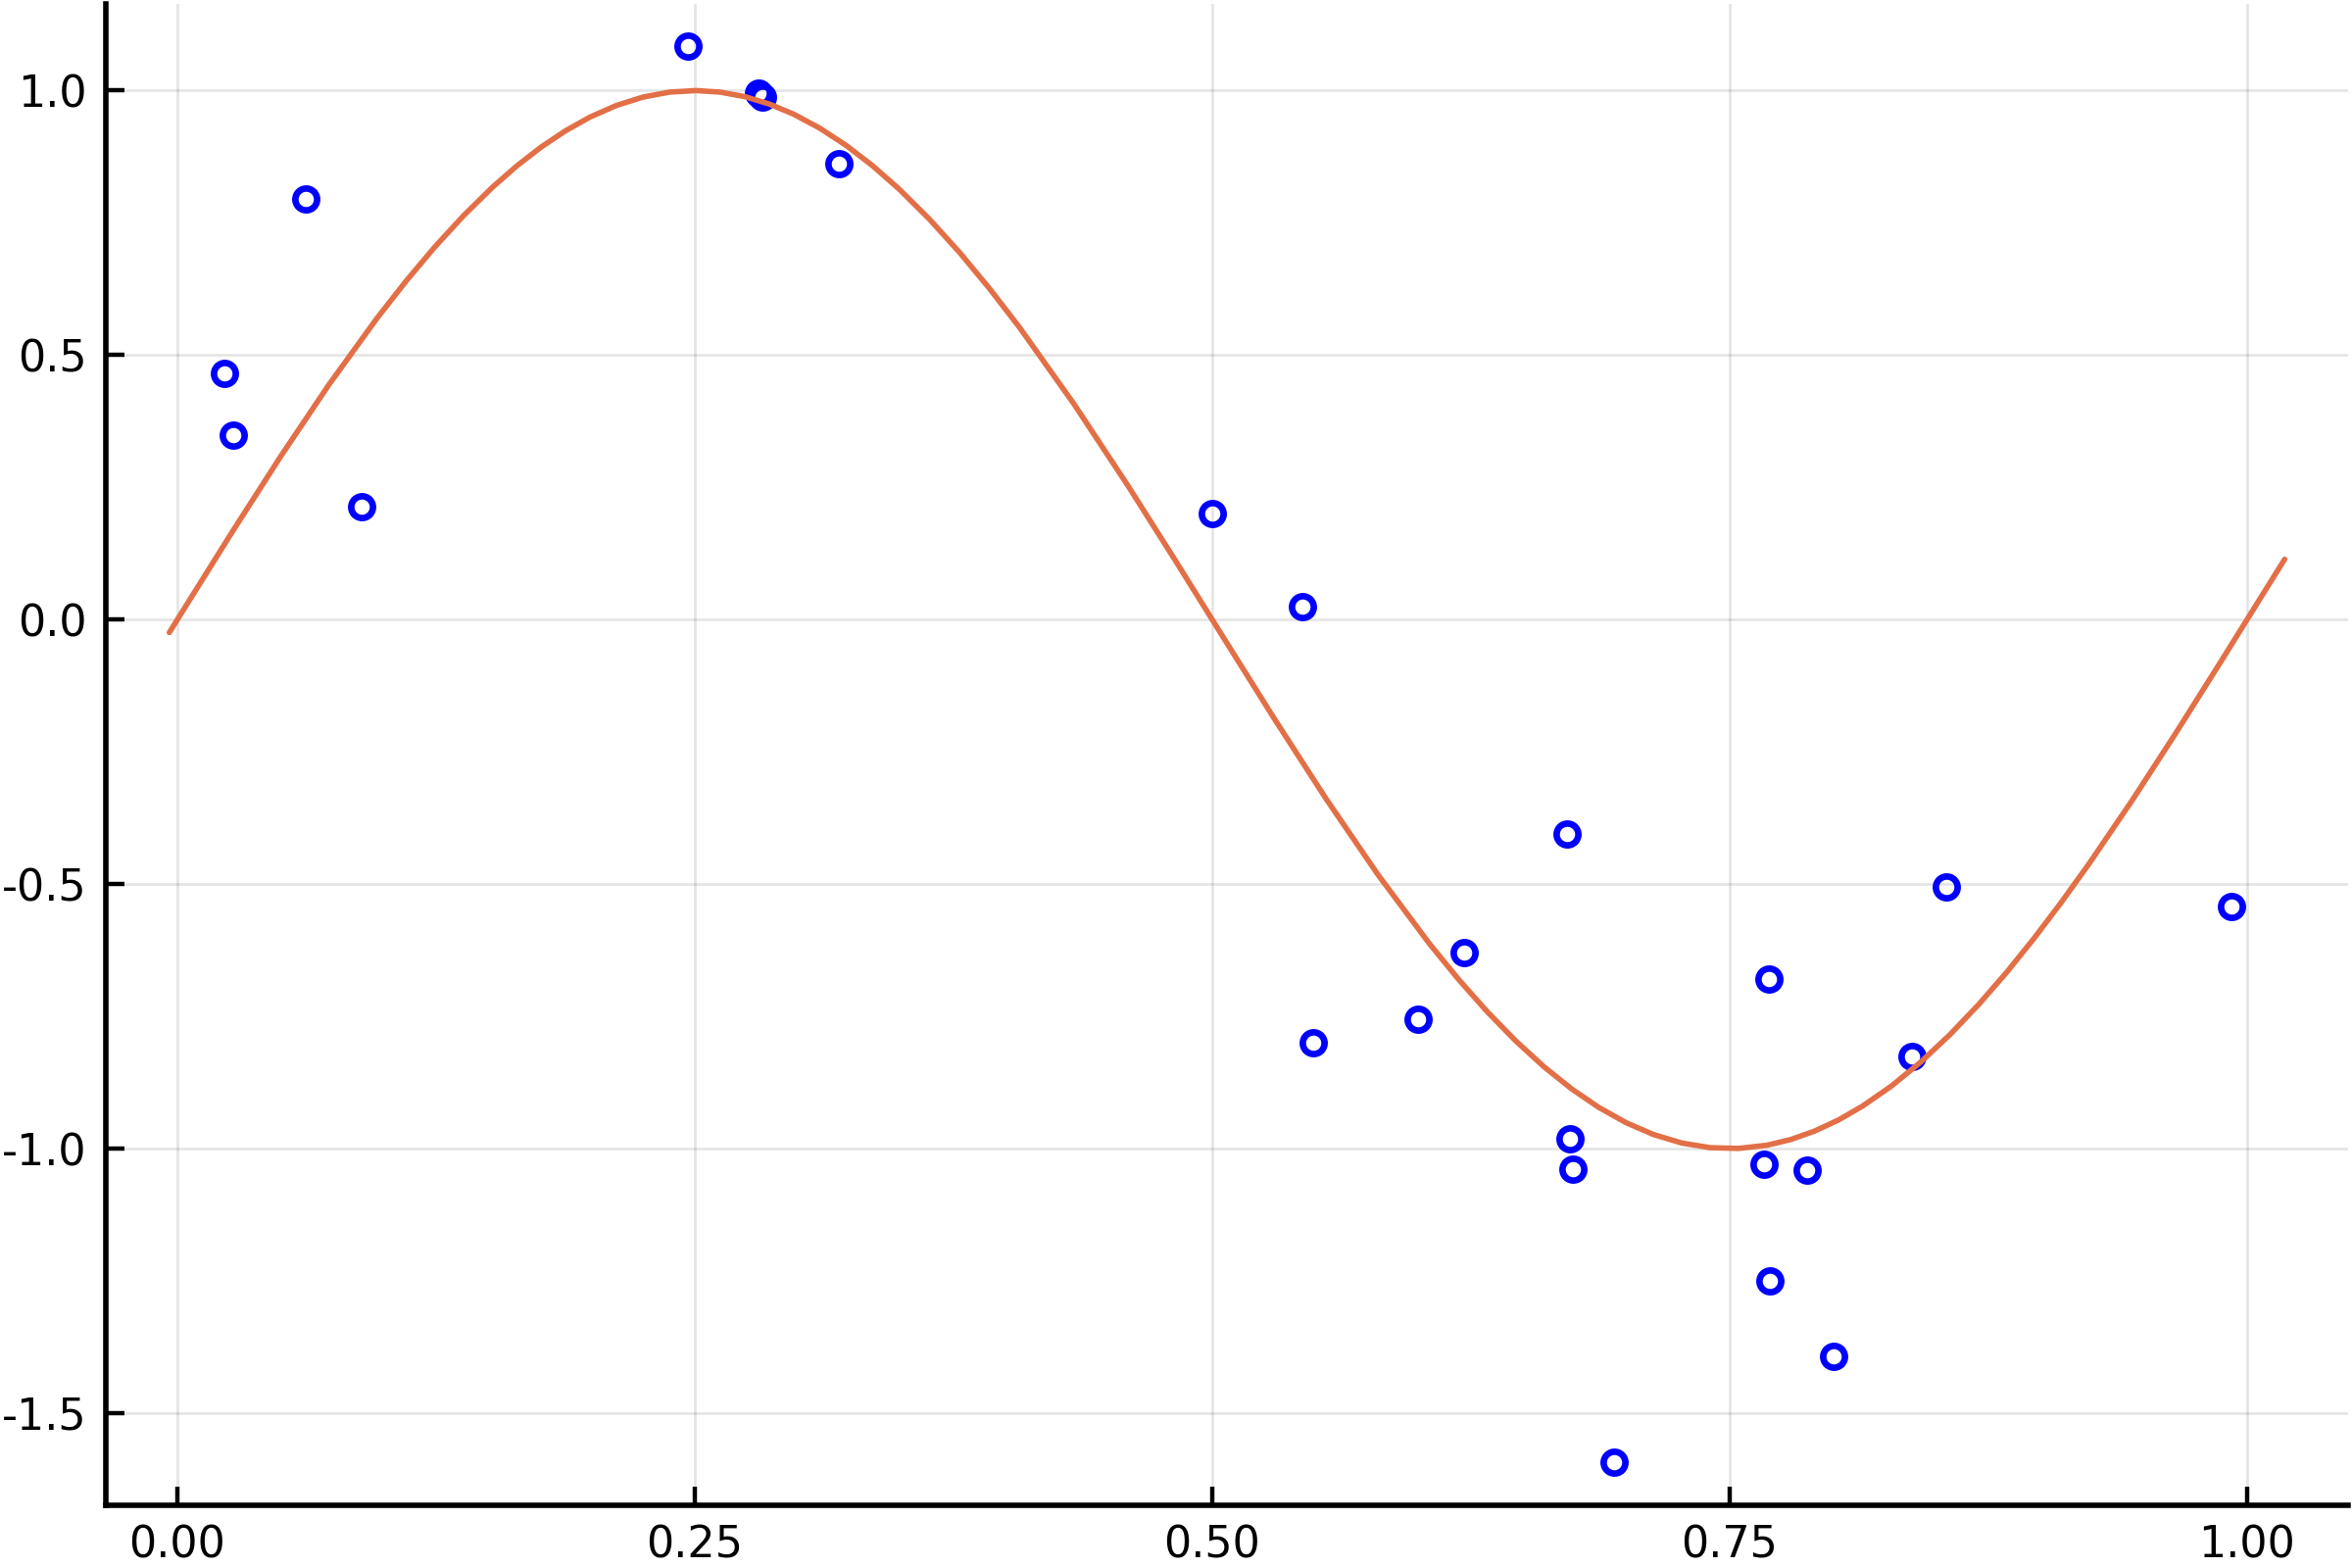

In [8]:
ds = datasets[rand(1:L)]
Φ = gaussian_expansion(ds[1], )
scatter(ds[1], ds[2], legend=false)
plot!(h)

Now, define a model to fit the data

In [17]:
M = 24
μs = range(0, 1, length=M)
s = 0.05

0.05

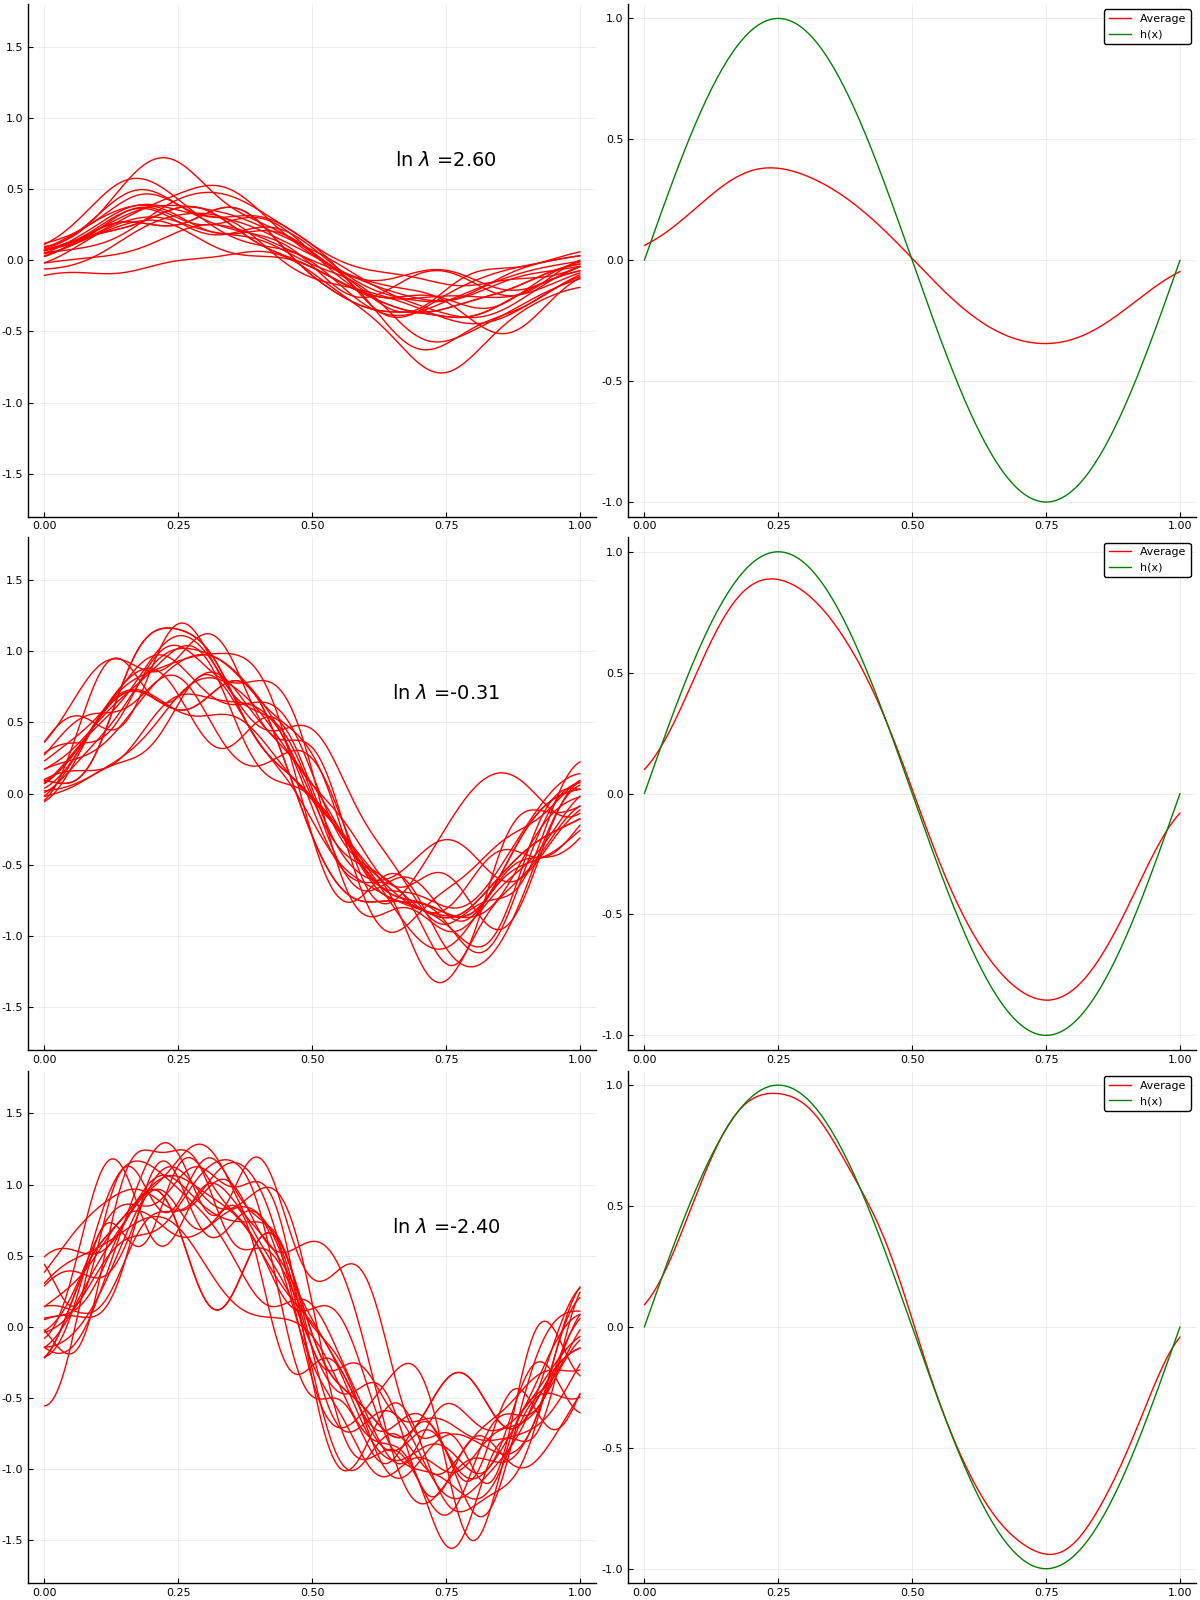

In [18]:
# To generate the figure 3.5 from Bishop
lambda_range = [exp(2.6), exp(-0.31), exp(-2.4)]
plots = []
for λ in lambda_range
    models = []
    for D in datasets
        lin_reg = LinearRegression(λ=λ)
        X, y = D
        Φ = gaussian_expansion(X, μs=μs, s=s)
        fit!(lin_reg, Φ, y)
        push!(models, lin_reg)
    end
    X_ = range(0, 1, length=200)
    Φ_ = gaussian_expansion(X_, μs=μs, s=s)
    p = plot(dpi=100)
    for model in models[rand(1:length(models), 20)]
        preds = predict(model, Φ_)
        plot!(X_, preds, color=:red, label="")
    end
    annotate!(.75, .7, L"ln $\lambda$ =" * @sprintf("%2.2f", log(λ)))
    ylims!(-1.8, 1.8)
    push!(plots, p)
    p = plot(dpi=100)
    y_av = mean([predict(model, Φ_) for model in models])
    plot!(X_, y_av, color=:red, label="Average")
    plot!(X_, h, color=:green, label="h(x)")
    push!(plots, p)
end
plot(plots..., layout=(3, 2), size=(1200, 1600))
        